# Modell zur Bachelorarbeit

In [1]:
import pandas as pd
import numpy as np
import dill as pickle

import matplotlib.pyplot as plt

from custom_thesis_functions import *

%matplotlib inline

In [2]:
instance_info = ""

In [3]:
period = pd.date_range('2017-01-01 00:00', '2017-01-07 23:45', freq='h')

# _________________________________

In [4]:
path_tmp = path_pickle_data + create_date_format(period) + '\\'

## Import

In [5]:
filename = path_tmp + "\\network" + instance_info + ".pickle"

with open((path_tmp + 'network.pickle'), 'rb') as f:
    network = pickle.load(f)

In [6]:
excelFile_demand = pd.ExcelFile(path_import_data + 'DE Realisierter Stromverbrauch 2017.xlsx')

In [7]:
df_demand = pd.read_excel(excelFile_demand, sheet_name="mapping_demand",
                          index_col=0, header=0, usecols="A:J")

In [8]:
df_demand = (df_demand.replace('-',0)
             .resample('1H').sum()
             .loc[period])

## Visualization

## Map topography

Map in the background relies on the mpl_toolkits and the basemap packages to be installed

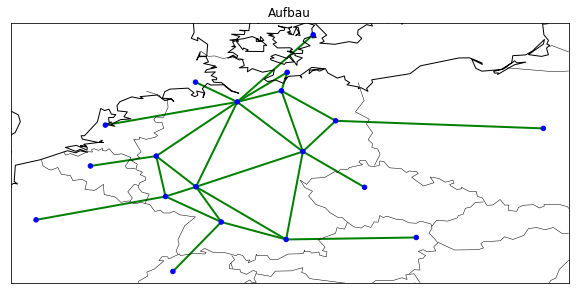

In [9]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(10,10)

network.plot(bus_sizes=20, title="Aufbau")
fig.savefig(path_tmp + "Aufbau", bbox_inche="tight")

In [10]:
df_dispatch_calculated = network.generators_t.p.groupby(network.generators.carrier, axis=1).sum()
#df_dispatch_calculated[df_dispatch_calculated < 0] = 0
df_dispatch_calculated = df_dispatch_calculated[["Wind", "ee", "Braunkohle", "Steinkohle", "Erdgas", "Import"]]

In [11]:
colors = {"Erdgas":"orange",
          "Braunkohle":"brown",
          "Steinkohle":"black",
          "Wind":"blue",
          "ee":"green",
          "Import":"red",
          "Kernenergie":"yellow"}

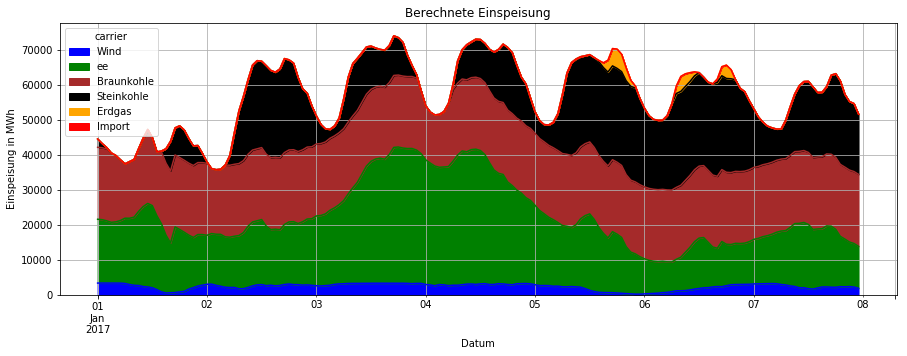

In [12]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(15,5)

ax.grid(True, which='minor')
ax.set_xlabel("Datum")
ax.set_ylabel("Einspeisung in MWh")
df_dispatch_calculated.plot(kind='area', ax=ax, title="Berechnete Einspeisung", grid=True, color=[colors[i] for i in df_dispatch_calculated.columns])

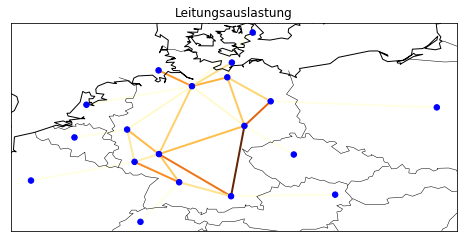

In [15]:
fig,ax=plt.subplots(nrows=1, ncols=1, figsize=(8,8))

s_perc_avg_load = network.lines_t.p0.mean() / network.lines.s_nom

dist = network.plot(bus_sizes=30, line_colors=abs(s_perc_avg_load), title="Leitungsauslastung", line_cmap="YlOrBr")

(<matplotlib.collections.PathCollection at 0x21f51483588>,
 <matplotlib.collections.LineCollection at 0x21f51483cf8>)

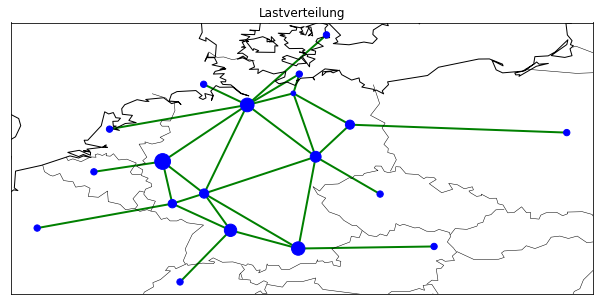

In [51]:
fig,ax1 = plt.subplots(1,1)
fig.set_size_inches(15,5)

rel_bus_size = df_demand.mean()/100
i = len(network.buses) - len(rel_bus_size)
while i <= len(network.buses):
    rel_bus_size = np.append(rel_bus_size, 20)
    i += 1
network.plot(ax=ax1,bus_sizes=rel_bus_size*2, title="Lastverteilung")

# df_demand_reldist = df_demand.T/df_demand.agg('sum', axis=1).values
# df_demand_reldist.T.plot(kind='area', ax=ax2, legend=False)

In [45]:
df_demand_reldist

,2017-01-01 00:00:00,2017-01-01 01:00:00,2017-01-01 02:00:00,2017-01-01 03:00:00,2017-01-01 04:00:00,2017-01-01 05:00:00,2017-01-01 06:00:00,2017-01-01 07:00:00,2017-01-01 08:00:00,2017-01-01 09:00:00,...,2017-01-07 14:00:00,2017-01-07 15:00:00,2017-01-07 16:00:00,2017-01-07 17:00:00,2017-01-07 18:00:00,2017-01-07 19:00:00,2017-01-07 20:00:00,2017-01-07 21:00:00,2017-01-07 22:00:00,2017-01-07 23:00:00
"Niedersachsen, Bremen, Hamburg, Schleswig-Holstein(node_id 0)",0.163153,0.163147,0.163123,0.163124,0.163143,0.163146,0.163149,0.163103,0.163157,0.163122,...,0.163129,0.163124,0.163143,0.163139,0.163131,0.163134,0.163145,0.163135,0.163124,0.163133
Nordrhein-Westfalen(node_id 1),0.216302,0.216340,0.216300,0.216330,0.216317,0.216343,0.216302,0.216331,0.216326,0.216339,...,0.216323,0.216300,0.216303,0.216323,0.216310,0.216300,0.216321,0.216342,0.216309,0.216335
Hessen(node_id 2),0.074902,0.074892,0.074891,0.074908,0.074896,0.074891,0.074900,0.074898,0.074903,0.074915,...,0.074904,0.074900,0.074908,0.074908,0.074900,0.074905,0.074901,0.074903,0.074898,0.074890
"Rheinland-Pfalz, Saarland(node_id 3)",0.061149,0.061137,0.061168,0.061156,0.061169,0.061164,0.061151,0.061170,0.061138,0.061144,...,0.061169,0.061161,0.061160,0.061153,0.061158,0.061155,0.061157,0.061139,0.061149,0.061148
Baden-Württemberg(node_id 4),0.132927,0.132903,0.132943,0.132928,0.132923,0.132915,0.132921,0.132913,0.132937,0.132921,...,0.132908,0.132932,0.132908,0.132905,0.132924,0.132933,0.132898,0.132928,0.132916,0.132898
Bayern(node_id 5),0.157063,0.157102,0.157082,0.157075,0.157084,0.157100,0.157103,0.157107,0.157102,0.157087,...,0.157092,0.157110,0.157076,0.157083,0.157083,0.157094,0.157102,0.157086,0.157082,0.157105
"Berlin, Brandenburg(node_id 6)",0.072498,0.072461,0.072489,0.072488,0.072483,0.072452,0.072466,0.072479,0.072471,0.072496,...,0.072465,0.072480,0.072471,0.072485,0.072478,0.072466,0.072474,0.072476,0.072500,0.072486
Mecklenburg-Vorpommern(node_id 7),0.019282,0.019290,0.019311,0.019283,0.019258,0.019281,0.019287,0.019303,0.019276,0.019304,...,0.019306,0.019287,0.019328,0.019301,0.019315,0.019315,0.019297,0.019287,0.019315,0.019304
"Sachsen, Sachsen-Anhalt, Thüringen(node_id 8)",0.102724,0.102728,0.102692,0.102708,0.102728,0.102709,0.102720,0.102696,0.102691,0.102673,...,0.102704,0.102706,0.102706,0.102703,0.102701,0.102699,0.102703,0.102702,0.102708,0.102702
